## Bottleneck cross-validation

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import momi
import os
import pandas as pd
import PTA

from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="ipyrad")
print(len(ipyclient))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
40


In [12]:
model = PTA.DemographicModel("bottleneck")
model.set_param("project_dir", "./analysis/bottleneck/8samps_bottleneck_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 8)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 1000)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = False
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=40000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding            ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/8samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
8                    ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
1000,1000,1000,1000,1000,1000,1000,1000 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [r

In [22]:
sim_df = pd.read_csv("./analysis/bottleneck/8samps_bottleneck_sims/expanding-SIMOUT.csv", sep=" ")
print(len(sim_df))
sfs_cols = [col for col in sim_df.columns if col.startswith("pop")]
params_cols = [col for col in sim_df.columns if col not in sfs_cols]
display(sim_df[sfs_cols].head())
display(sim_df[params_cols].head())

52847


,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]]
0,7270.000,6105.000,5349.000,2438.000,7047.000,6099.000,5160.000,2800.000,7299.000,6265.000,5350.000,2554.000,13350.000,12495.000,11457.000,6387.000,30966.000,23224.000,23262.000,11069.000,6466.000,5249.000,4897.000,2343.000,4069.000,3513.000,3000.000,1262.000,2002.000,1806.000,1726.000,805.000
1,0.401,0.249,0.240,0.110,0.331,0.286,0.244,0.139,0.325,0.265,0.308,0.102,0.325,0.274,0.270,0.131,0.339,0.288,0.236,0.137,0.410,0.272,0.224,0.094,0.312,0.293,0.275,0.120,0.327,0.271,0.270,0.132
2,0.363,0.287,0.234,0.117,0.312,0.294,0.268,0.126,0.308,0.283,0.274,0.135,0.417,0.251,0.229,0.103,0.308,0.287,0.263,0.141,0.396,0.254,0.242,0.108,0.338,0.303,0.239,0.120,0.369,0.276,0.235,0.120
3,0.300,0.287,0.268,0.145,0.345,0.279,0.252,0.124,0.337,0.265,0.263,0.135,0.374,0.254,0.262,0.109,0.372,0.264,0.243,0.121,0.352,0.267,0.263,0.119,0.396,0.255,0.229,0.120,0.425,0.258,0.241,0.075
4,0.406,0.272,0.217,0.104,0.403,0.258,0.236,0.103,0.394,0.267,0.230,0.109,0.414,0.272,0.221,0.093,0.409,0.283,0.222,0.086,0.315,0.282,0.259,0.143,0.378,0.282,0.216,0.124,0.406,0.262,0.226,0.106


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
0,0.389,3,1,150887,0.0,402743.333,235563.500,0.085,-1.731,396524.0,423915.25,12.548,3.757,0.150,-1.262,12.587,5.739,401310.000,272149.966,0.798,-0.888,329943.0,264662.75
1,0.164,1,0,785312,0.0,617505.875,239510.954,-1.001,-0.308,742517.5,320366.50,8.719,5.160,0.988,-0.280,6.077,5.923,510642.875,238780.182,0.182,-1.324,460893.5,349410.25
2,0.003,0,0,323205,0.0,467283.250,290783.686,-0.049,-1.259,454027.0,452864.75,9.998,5.446,0.454,-1.066,9.561,8.660,467535.500,231011.538,-0.214,-0.999,484804.0,282341.00
3,0.312,2,1,209962,0.0,477769.286,229916.271,0.305,-0.882,450170.0,298242.00,8.047,3.728,0.086,-1.085,7.794,5.295,432743.750,329992.374,0.915,-0.816,295820.5,275827.00
4,0.575,5,1,252969,0.0,473817.750,322548.121,-0.067,-1.779,489375.5,549354.75,6.966,7.400,1.149,-0.671,2.926,4.661,661772.125,285744.204,-0.703,-1.040,791622.5,386730.75


In [2]:
from sklearn.ensemble import RandomForestRegressor
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
# This is super dumb
sim_df = pd.read_csv("./analysis/bottleneck/8samps_bottleneck_sims/expanding-SIMOUT.csv", sep=" ")
synthetic_community = pd.DataFrame(sim_df.loc[0]).T.drop(PTA.inference.default_targets, axis=1)


52847
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-16 03:18:31.639350
Predict() finished: 2021-09-16 03:20:03.440397
                             MAE         RMSE    vscore        R2
zeta                    0.180867     0.000950  0.426113  0.426055
zeta_e                  1.454254     0.007681  0.431284  0.431227
psi                     0.256191     0.001495  0.220670  0.220633
t_s                198321.873888  1049.190745  0.286353  0.286306
omega                   0.008860     0.002266 -0.001649 -0.001649
taus_mean          104931.648021   586.301207  0.218784  0.218698
taus_std            67937.908041   373.672218  0.245873  0.245864
taus_skewnes

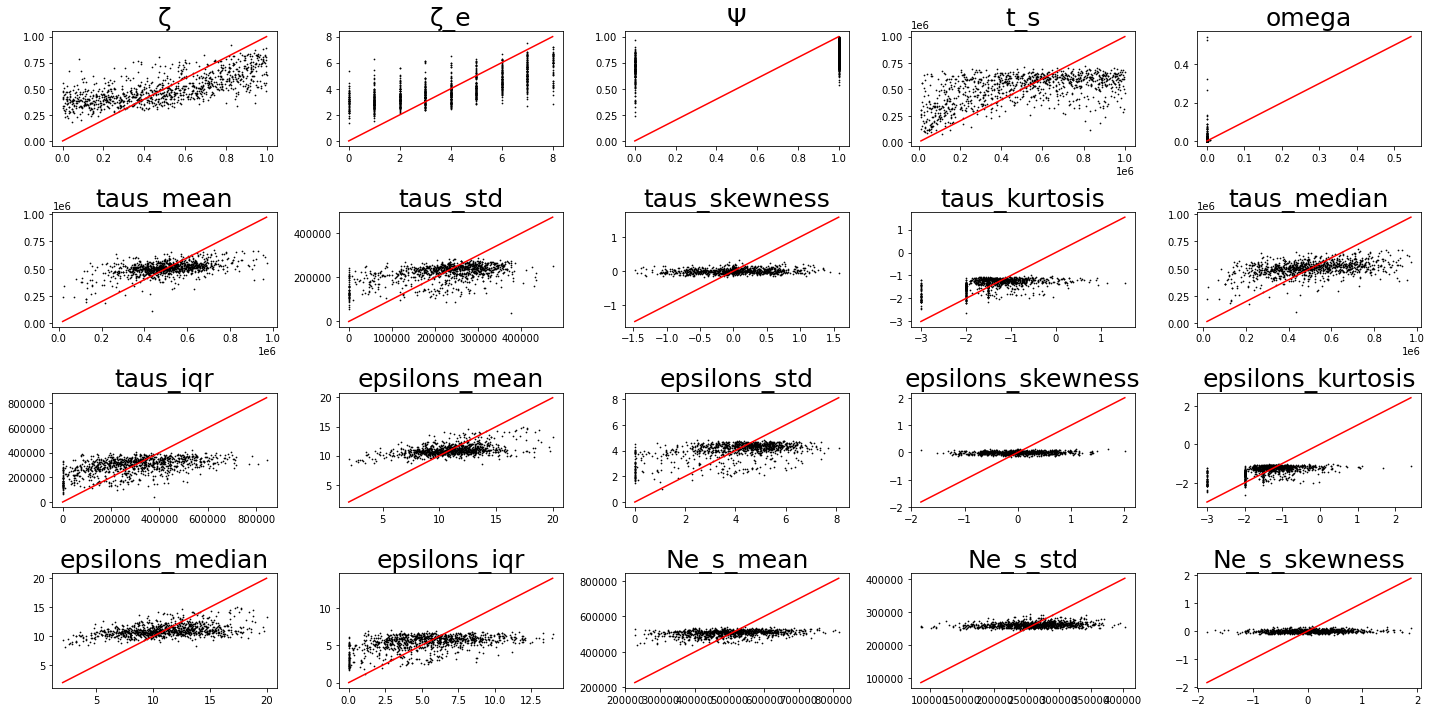

In [14]:
sim_df1 = pd.read_csv("./analysis/bottleneck/8samps_bottleneck_sims/expanding-SIMOUT.csv", sep=" ")
print(len(sim_df1))
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df1,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

## Sorted summary statistics

In [15]:
model = PTA.DemographicModel("bottleneck-sorted")
model.set_param("project_dir", "./analysis/bottleneck/8samps_bottleneck_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 8)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = True
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=40000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-sorted     ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/8samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
8                    ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recoms_pe

56000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-17 02:46:14.695497
Predict() finished: 2021-09-17 02:47:51.063700
                             MAE         RMSE    vscore        R2
zeta                    0.186314     0.000957  0.383160  0.383160
zeta_e                  1.502081     0.007743  0.388554  0.388554
psi                     0.270416     0.001539  0.121766  0.121765
t_s                213062.572431  1081.544311  0.199830  0.199829
omega                   0.029980     0.008237 -0.002316 -0.002316
taus_mean          105157.003369   573.022644  0.214692  0.214686
taus_std            68217.814522   366.148226  0.231725  0.231725
taus_skewnes

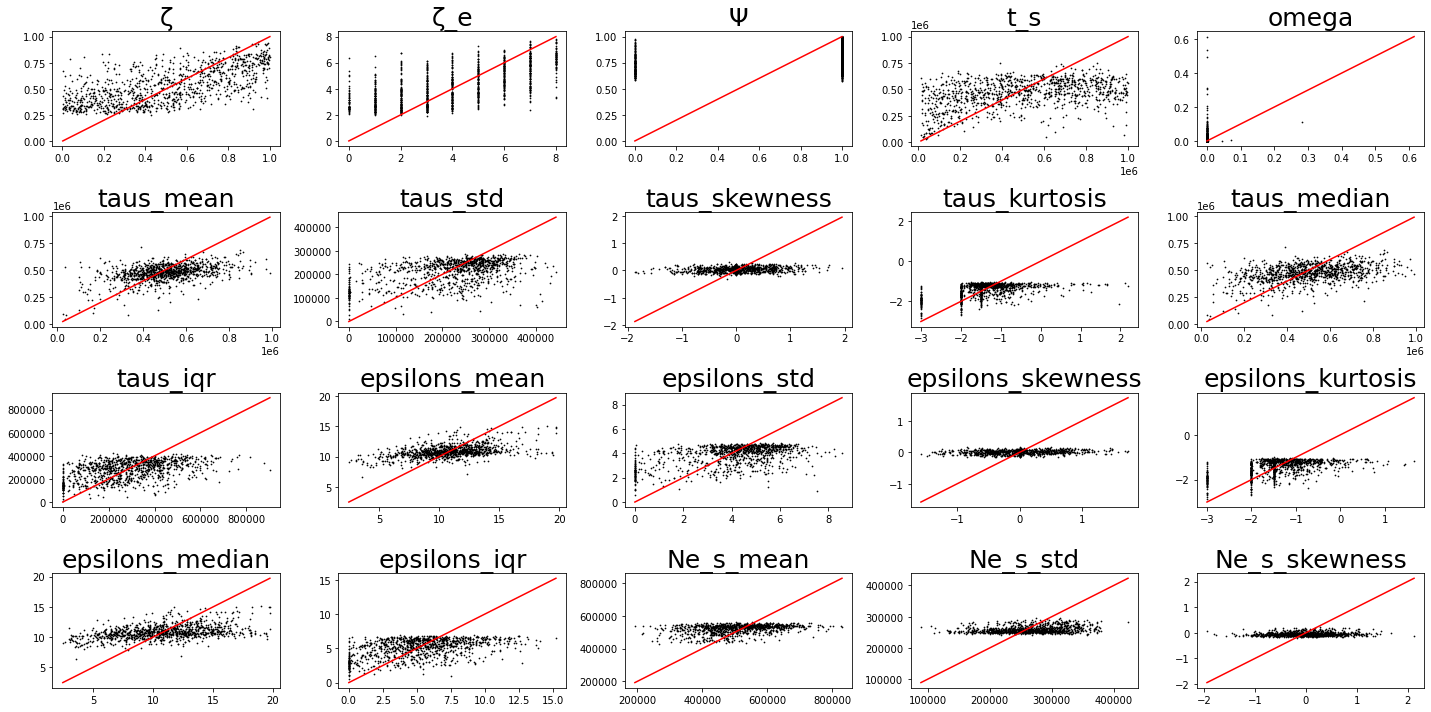

In [16]:
sim_df2 = pd.read_csv("./analysis/bottleneck/8samps_bottleneck_sims/expanding-sorted-SIMOUT.csv", sep=" ")
print(len(sim_df2))
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df2,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

# GB

In [18]:
gb_params = {'n_estimators': 1000,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}

## GB unsorted

52847
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-20 10:33:33.069844
Predict() finished: 2021-09-20 14:55:10.925351
Calculating prediction interval(s)
	zeta
	zeta_e
	psi
	t_s
	omega
	taus_mean
	taus_std
	taus_skewness
	taus_kurtosis
	taus_median
	taus_iqr
	epsilons_mean
	epsilons_std
	epsilons_skewness
	epsilons_kurtosis
	epsilons_median
	epsilons_iqr
	Ne_s_mean
	Ne_s_std
	Ne_s_skewness
	Ne_s_kurtosis
	Ne_s_median
	Ne_s_iqr
                             MAE         RMSE    vscore        R2
zeta                    0.138381     0.000789  0.604033  0.604011
zeta_e                  1.106666     0.006354  0.610731  0.610707
psi                     0.1946

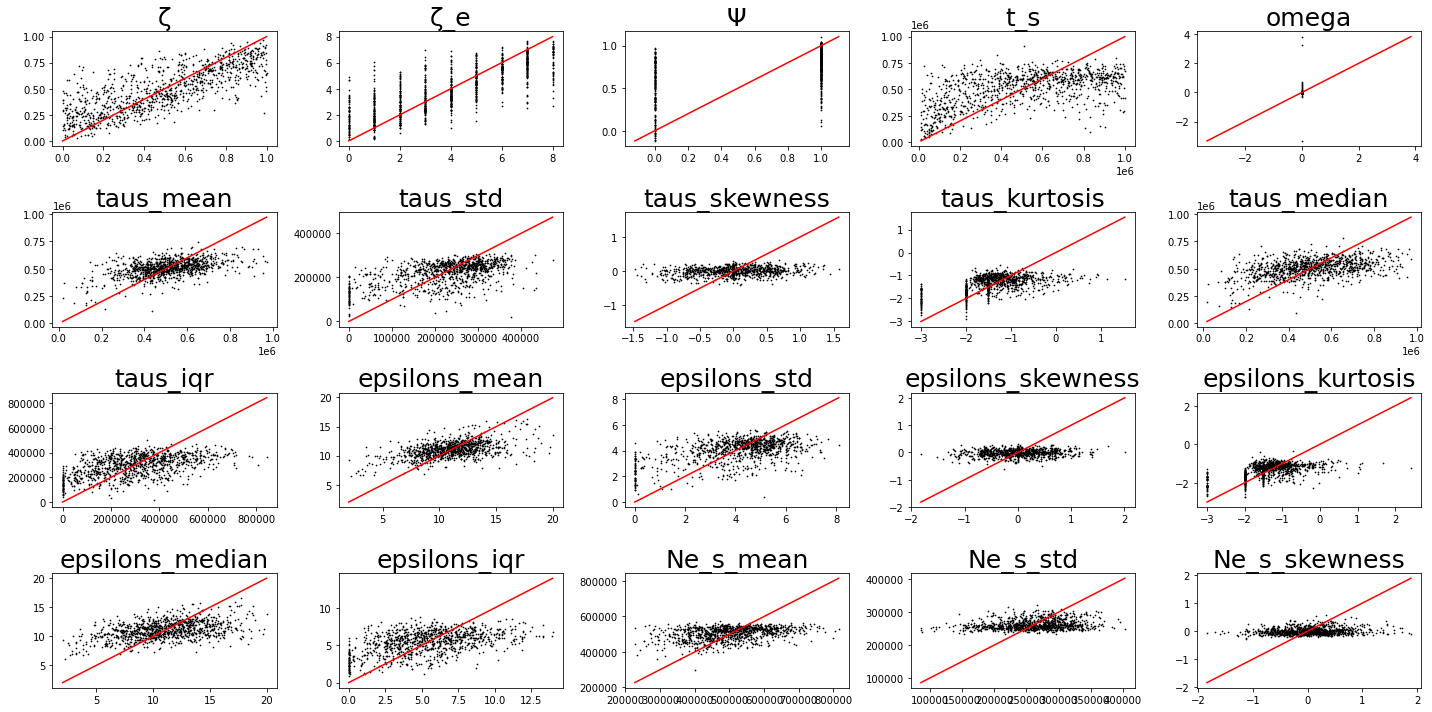

In [20]:
sim_df1 = pd.read_csv("./analysis/bottleneck/8samps_bottleneck_sims/expanding-SIMOUT.csv", sep=" ")
print(len(sim_df1))
gb_unsorted = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df1,\
                                algorithm="gb",\
                                verbose=True)
gb_unsorted.set_params(gb_params)
gb_unsorted.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = gb_unsorted.cross_val_predict(verbose=True)
cv_scores1 = gb_unsorted.cross_val_score(verbose=True)
ax = gb_unsorted.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

## GB Sorted

56000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-21 07:07:53.578004
Predict() finished: 2021-09-21 07:40:37.158671
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
                  MAE         RMSE    vscore        R2
zeta_e       1.446402     0.007621  0.407653  0.407653
t_s     213191.938652  1090.674819  0.186264  0.186262
omega        0.062267     0.008711 -0.120964 -0.120964


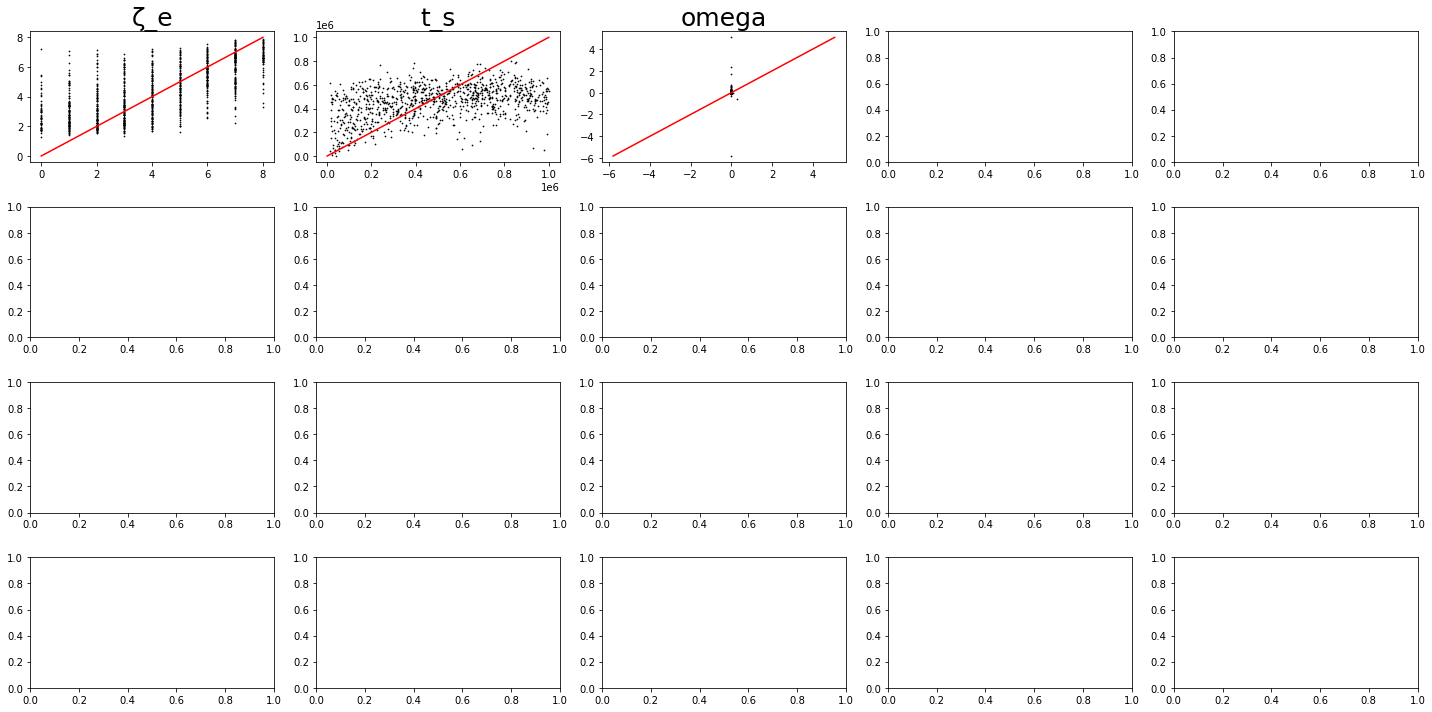

In [21]:
sim_df1 = pd.read_csv("./analysis/bottleneck/8samps_bottleneck_sims/expanding-sorted-SIMOUT.csv", sep=" ")
print(len(sim_df1))
gb_sorted = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df1,\
                                algorithm="gb",\
                                verbose=True)
gb_sorted.set_params(gb_params)
gb_sorted.set_targets(["zeta_e", "t_s", "omega"])
gb_sorted.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = gb_sorted.cross_val_predict(verbose=True)
cv_scores1 = gb_sorted.cross_val_score(verbose=True)
ax = gb_sorted.plot_cv_predictions(figsize=(20,10), figdims=(4,5))